# Linear Regression Assignment - Bike sharing

Problem statement:
    BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.
    
Resolution needed:
    Mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end
    
Strategy:
    A. Data analysis
    
    i. Understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19
    ii. Understand the factors on which the demand for these shared bikes depends

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv file using pandas

In [2]:
df= pd.read_csv('day.csv')
#To check column details
df.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Check null or missing values

In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Descriptive analytics for data

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Dropping data which is redundant

In [5]:
# Because cnt is our dependent variable and derived from'casual' and 'registered' are redundant columns. 
# instant is dropped because it is a sequence number
# dte is dropped because details of date are captured in other columns
df.drop(['casual', 'registered','instant','dteday'], inplace=True, axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Data Encoding for season, weekday, weather sit, month

In [6]:
# Replacing season with (1:spring, 2:summer, 3:fall, 4:winter)
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [7]:
# Replace weathersit : 1: Clear, 2: Mist ,3: Light Snow,4: Heavy Rain 
df['weathersit'].replace({1:"Clear",2:"Mist",3:"Light_Snow",4:'Heavy Rain'},inplace=True)
# Replace weekday : 0:Sunday,1:Monday,2:Tuesday,3:Wednesday,4:Thursday,5:Friday,6:Saturday
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace = True)
#Replace month : 1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'
df['mnth'].replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}, inplace = True)

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Continuous data check for multicollinearity

C:\Users\neelamjh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


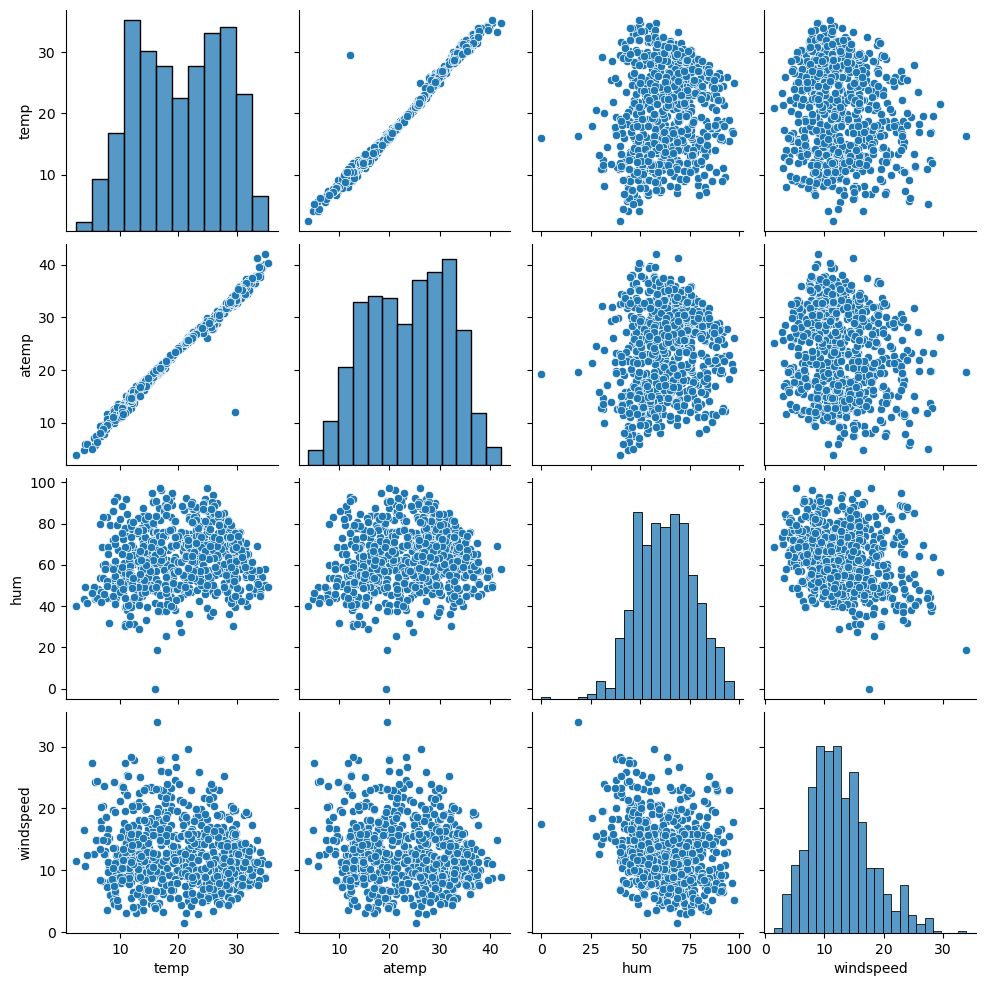

In [9]:
sns.pairplot(data=df, vars=['temp', 'atemp', 'hum','windspeed'])
plt.show()

Inferences: 
=========
1. Temp and atemp are heavily corelated
2. Not a strong corelation found with other variables

# Visualization of correlation with target variable cnt

C:\Users\neelamjh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


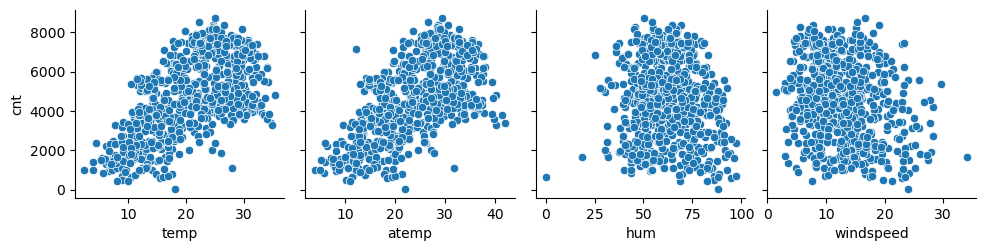

In [10]:
#Visualizing the data using pairplot for numeric variables wrt to target variable
sns.pairplot(data=df,x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt')
plt.show()

Inferences:
===========
1. Temp and atemp are showing a positive linear correlation with cnt but not a strong corealtion

# Plotting the corelation values

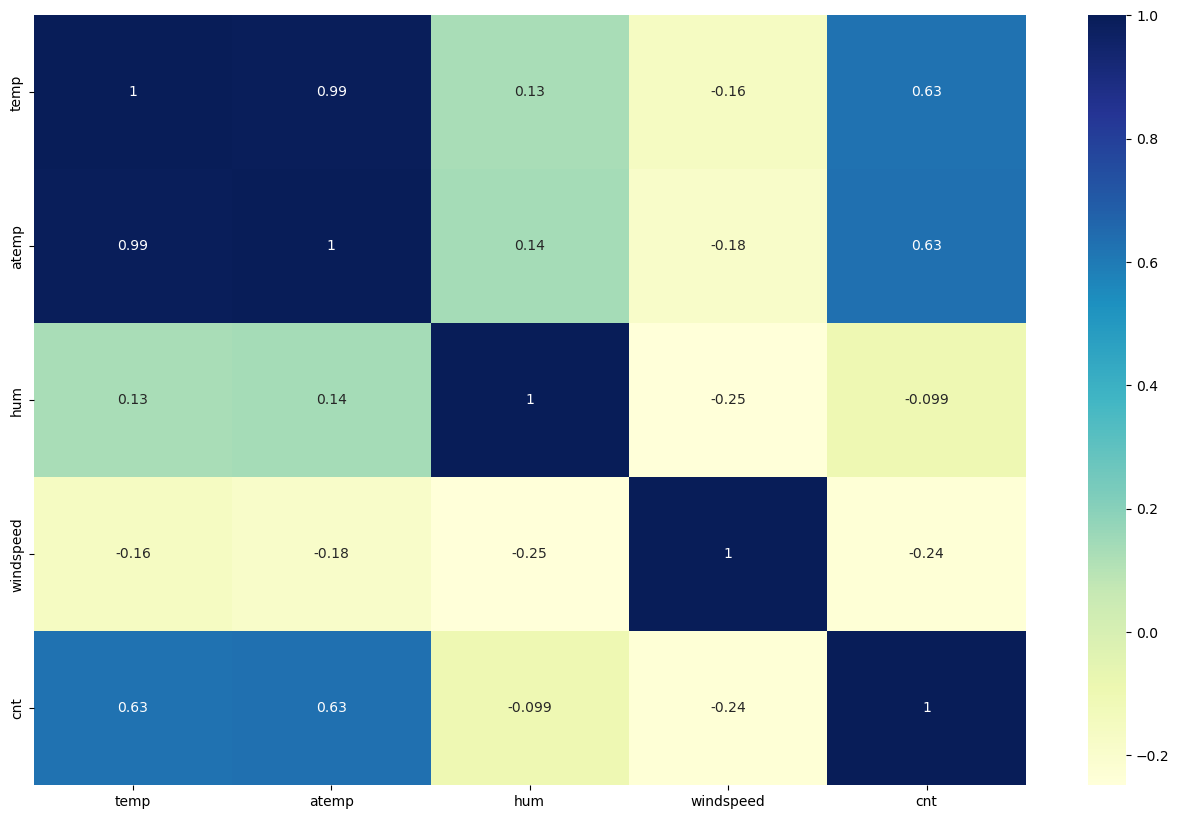

In [11]:
plt.figure(figsize = (16, 10))
df1 = df[['temp', 'atemp', 'hum','windspeed','cnt']]
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dropping heavily corelated variables

In [12]:
#dropping atemp as corealtion value is 0.99
df.drop(['atemp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


# Categorical data visualization

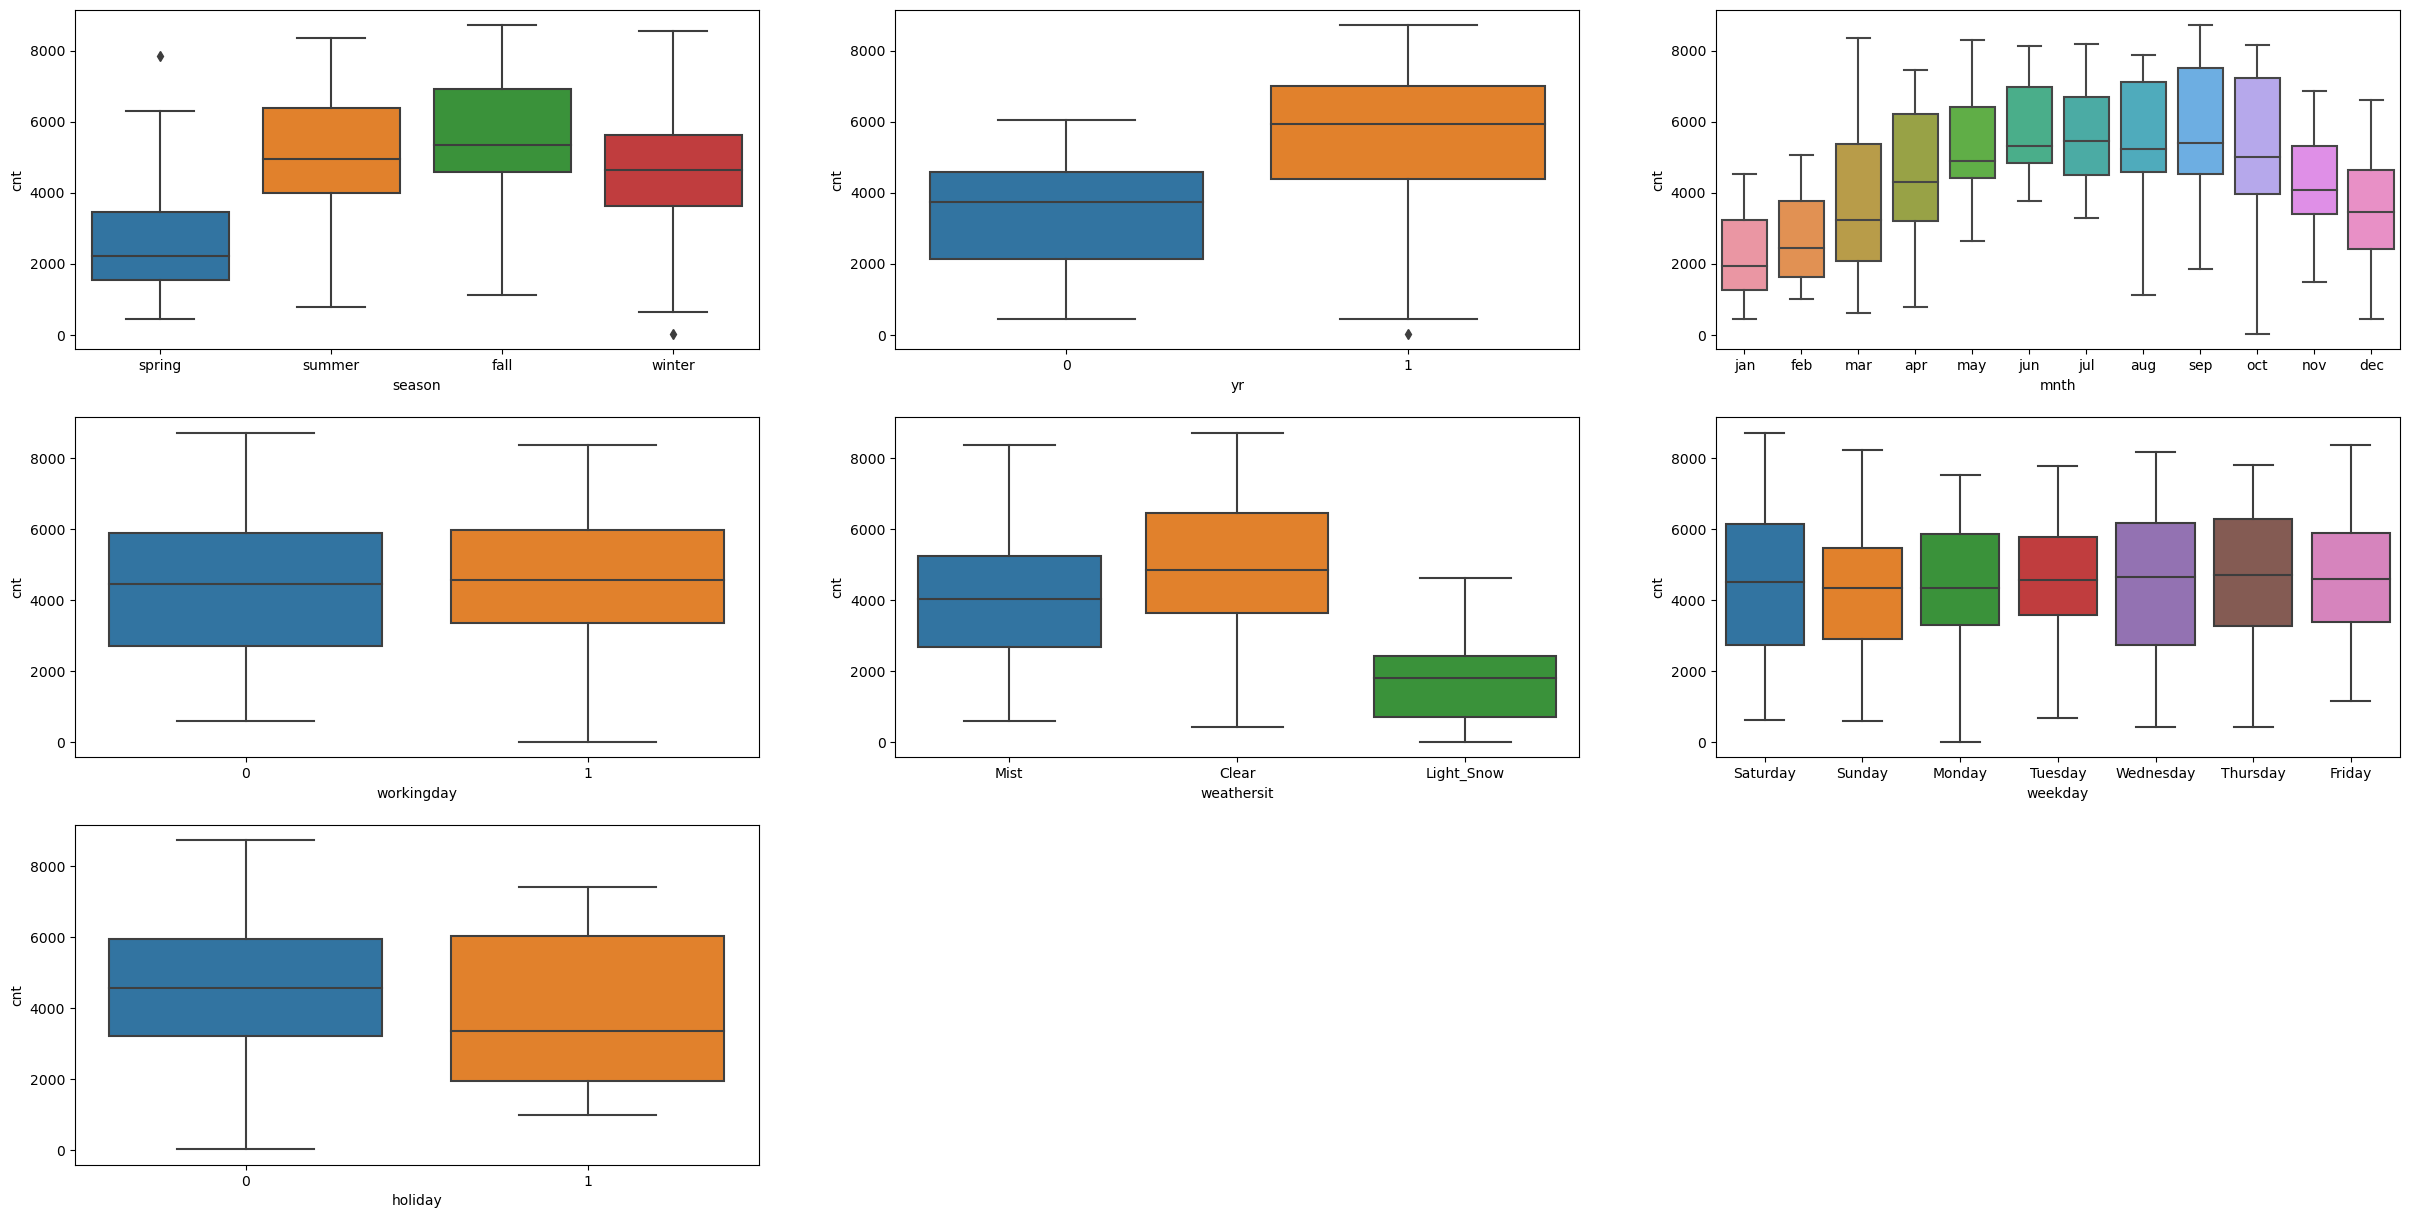

In [13]:
#Visualising categorical Variables using box plot
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

Inferences:
===========
1. Bike demand is higher during summer and fall
2. Bike demand was higher for 2019 than 2018
3. Average Bike demand is higher when it is not a holiday
4. Average bike demand is higher during months from May to Oct

# Creating dummies for categorical variables

In [14]:
#creating dataframe for categorical variables and then creating dummies
df2= df[['season','mnth','weekday','weathersit']]
df2 = pd.get_dummies(df2,drop_first=True, dtype = int )

In [15]:
#Concatenating the dummy with the actual dataframe and dropping the categorical variables from which dummies were created
df = pd.concat([df2,df],axis = 1)
df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
df.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season_spring          730 non-null    int32  
 1   season_summer          730 non-null    int32  
 2   season_winter          730 non-null    int32  
 3   mnth_aug               730 non-null    int32  
 4   mnth_dec               730 non-null    int32  
 5   mnth_feb               730 non-null    int32  
 6   mnth_jan               730 non-null    int32  
 7   mnth_jul               730 non-null    int32  
 8   mnth_jun               730 non-null    int32  
 9   mnth_mar               730 non-null    int32  
 10  mnth_may               730 non-null    int32  
 11  mnth_nov               730 non-null    int32  
 12  mnth_oct               730 non-null    int32  
 13  mnth_sep               730 non-null    int32  
 14  weekday_Monday         730 non-null    int32  
 15  weekda

# Model Creation

a. Test and train data split

In [17]:
#importing libraries
from sklearn.model_selection import train_test_split

#Splitting data into test and train in the ratio of 70:30
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

b. Scaling the training data set

In [18]:
#importing the library
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#scaling the training data
num_vars = ['cnt','temp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


c. Dividing the training dataset into X and Y

In [19]:
y_train = df_train.pop('cnt')
X_train = df_train

d. Training the model

In [20]:
#importing Linear Regression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
# RFE used with 15 variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [22]:
#Printing columns trained by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [23]:
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_Saturday', 'weathersit_Light_Snow',
       'weathersit_Mist', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [24]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [25]:
#Building testdata
X_train_rfe = X_train[col]

e. Model creation

In [26]:
#importing library
import statsmodels.api as sm  

#Build model
X_train_rfe = sm.add_constant(X_train_rfe)

#Create the model
lr = sm.OLS(y_train,X_train_rfe)

#Fitting the model
lr_model = lr.fit()

#Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.31e-191
Time:                        22:45:26   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2510      0.036      6.949      0.000       0.180       0.322
season_spring            -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer             0.0497      0.015      3.346      0.001       0.020       0.079
season_winter             0.0944      0.017      5.479      0.000       0.061       0.128
mnth_jan                 -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_jul                 -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_sep                  0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Saturday          0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Light_Snow    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist          -0.0578      0.010     -5.574      0.000      -0.078      -0.037
yr                        0.2305      0.008     28.807      0.000       0.215       0.246
holiday                  -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                0.0435      0.012      3.781      0.000       0.021       0.066
temp                      0.5098      0.034     14.851      0.000       0.442       0.577
hum                      -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                -0.1860      0.025     -7.301      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences
===========
1. Since R-squared adj = 0.844 > 0.7, hence, the model is robust
2. Looking at the p values we can say that factors like spring,summer, winter, and months like Jan, July, Sep during Light snow or misty weather is getting impacted
3. While evaluatomg continuous variable factors like holiday,year, workibg day, temp, humidity and windspeed is also impacting our demand

# Including VIF analysis to remove multi-collienarity

In [27]:
#importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
1,season_spring,5.08
13,temp,3.89
3,season_winter,3.60
2,season_summer,2.64
14,hum,1.92
12,workingday,1.88
7,weekday_Saturday,1.78
4,mnth_jan,1.57
9,weathersit_Mist,1.57


# Removing the VIF greater than 5

In [28]:
X_train_drop = X_train_rfe.drop(['const'], axis=1)

In [29]:
#Checking VIF again
vif = pd.DataFrame()
X = X_train_drop
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,season_spring,4.53
2,season_winter,3.48
1,season_summer,2.84
8,weathersit_Mist,2.29
9,yr,2.09
6,weekday_Saturday,1.98


In [30]:
#Removing VIF greater than 5
X_train_drop = X_train_drop.drop(['hum'], axis=1)

In [31]:
#Checking VIF again
vif = pd.DataFrame()
X = X_train_drop
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_spring,3.08
1,season_summer,2.33
9,yr,2.08
2,season_winter,1.99
6,weekday_Saturday,1.97
3,mnth_jan,1.62
4,mnth_jul,1.59


In [32]:
#Build model
X_train_rfe1 = sm.add_constant(X_train_drop)

#Create the model
lr = sm.OLS(y_train,X_train_rfe1)

#Fitting the model
lr_model = lr.fit()

#Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          7.33e-189
Time:                        22:45:27   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1737      0.031      5.525      0.000       0.112       0.235
season_spring            -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_summer             0.0434      0.015      2.890      0.004       0.014       0.073
season_winter             0.0797      0.017      4.650      0.000       0.046       0.113
mnth_jan                 -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_jul                 -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_sep                  0.0753      0.017      4.522      0.000       0.043       0.108
weekday_Saturday          0.0584      0.015      3.980      0.000       0.030       0.087
weathersit_Light_Snow    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_Mist          -0.0826      0.009     -9.592      0.000      -0.100      -0.066
yr                        0.2344      0.008     29.019      0.000       0.218       0.250
holiday                  -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                0.0465      0.012      3.983      0.000       0.024       0.069
temp                      0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                -0.1563      0.025     -6.292      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Removing VIF greater than 5
X_train_drop = X_train_drop.drop(['temp'], axis=1)

In [34]:
#Checking VIF again
vif = pd.DataFrame()
X = X_train_drop
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,4.27
11,workingday,3.83
0,season_spring,2.97
1,season_summer,2.27
2,season_winter,1.99
9,yr,1.91
6,weekday_Saturday,1.69
3,mnth_jan,1.60
8,weathersit_Mist,1.56
4,mnth_jul,1.30


# Creating the model

In [35]:
#Build model
X_train_rfe1 = sm.add_constant(X_train_drop)

#Create the model
lr = sm.OLS(y_train,X_train_rfe1)

#Fitting the model
lr_model = lr.fit()

#Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.04e-154
Time:                        22:45:27   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5448      0.020     27.136      0.000       0.505       0.584
season_spring            -0.2603      0.018    -14.490      0.000      -0.296      -0.225
season_summer            -0.0440      0.016     -2.729      0.007      -0.076      -0.012
season_winter            -0.0749      0.016     -4.829      0.000      -0.105      -0.044
mnth_jan                 -0.1024      0.020     -5.104      0.000      -0.142      -0.063
mnth_jul                 -0.0099      0.021     -0.461      0.645      -0.052       0.032
mnth_sep                  0.0708      0.020      3.601      0.000       0.032       0.109
weekday_Saturday          0.0564      0.017      3.252      0.001       0.022       0.090
weathersit_Light_Snow    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
weathersit_Mist          -0.0896      0.010     -8.824      0.000      -0.110      -0.070
yr                        0.2478      0.009     26.156      0.000       0.229       0.266
holiday                  -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday                0.0480      0.014      3.482      0.001       0.021       0.075
windspeed                -0.1878      0.029     -6.429      0.000      -0.245      -0.130
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dropping variable with high p-value

In [36]:
X_train_drop = X_train_drop.drop(['mnth_jul'], axis=1)

In [37]:
#Checking VIF again
vif = pd.DataFrame()
X = X_train_drop
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,windspeed,4.12
10,workingday,3.54
0,season_spring,2.68
1,season_summer,2.00
8,yr,1.89
2,season_winter,1.78
5,weekday_Saturday,1.62
3,mnth_jan,1.60
7,weathersit_Mist,1.56
4,mnth_sep,1.20


In [38]:
#Build model
X_train_rfe1 = sm.add_constant(X_train_drop)

#Create the model
lr = sm.OLS(y_train,X_train_rfe1)

#Fitting the model
lr_model = lr.fit()

#Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.62e-155
Time:                        22:45:27   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5409      0.018     29.669      0.000       0.505       0.577
season_spring            -0.2568      0.016    -15.797      0.000      -0.289      -0.225
season_summer            -0.0405      0.014     -2.848      0.005      -0.068      -0.013
season_winter            -0.0716      0.014     -5.213      0.000      -0.099      -0.045
mnth_jan                 -0.1025      0.020     -5.111      0.000      -0.142      -0.063
mnth_sep                  0.0736      0.019      3.928      0.000       0.037       0.110
weekday_Saturday          0.0565      0.017      3.263      0.001       0.022       0.091
weathersit_Light_Snow    -0.3046      0.029    -10.647      0.000      -0.361      -0.248
weathersit_Mist          -0.0893      0.010     -8.820      0.000      -0.109      -0.069
yr                        0.2478      0.009     26.182      0.000       0.229       0.266
holiday                  -0.0567      0.032     -1.760      0.079      -0.120       0.007
workingday                0.0483      0.014      3.506      0.000       0.021       0.075
windspeed                -0.1877      0.029     -6.431      0.000      -0.245      -0.130
==============================================================================
Omnibus:                       34.752   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.753
Skew:                          -0.423   Prob(JB):                     3.20e-15
Kurtosis:                       4.558   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Removing values with high p
X_train_drop = X_train_drop.drop(['holiday'], axis=1)

In [40]:
#Checking VIF again
vif = pd.DataFrame()
X = X_train_drop
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,windspeed,4.04
9,workingday,3.29
0,season_spring,2.65
1,season_summer,1.99
8,yr,1.88
2,season_winter,1.73
3,mnth_jan,1.60
5,weekday_Saturday,1.56
7,weathersit_Mist,1.56
4,mnth_sep,1.18


In [41]:
#Build model
X_train_rfe1 = sm.add_constant(X_train_drop)

#Create the model
lr = sm.OLS(y_train,X_train_rfe1)

#Fitting the model
lr_model = lr.fit()

#Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.30e-155
Time:                        22:45:27   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5334      0.018     30.033      0.000       0.499       0.568
season_spring            -0.2581      0.016    -15.860      0.000      -0.290      -0.226
season_summer            -0.0406      0.014     -2.847      0.005      -0.069      -0.013
season_winter            -0.0729      0.014     -5.303      0.000      -0.100      -0.046
mnth_jan                 -0.1031      0.020     -5.130      0.000      -0.143      -0.064
mnth_sep                  0.0714      0.019      3.810      0.000       0.035       0.108
weekday_Saturday          0.0650      0.017      3.900      0.000       0.032       0.098
weathersit_Light_Snow    -0.3034      0.029    -10.586      0.000      -0.360      -0.247
weathersit_Mist          -0.0888      0.010     -8.757      0.000      -0.109      -0.069
yr                        0.2480      0.009     26.149      0.000       0.229       0.267
workingday                0.0567      0.013      4.377      0.000       0.031       0.082
windspeed                -0.1887      0.029     -6.453      0.000      -0.246      -0.131
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.218
Skew:                          -0.458   Prob(JB):                     3.81e-18
Kurtosis:                       4.714   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here p values, VIF and R-sq adj is acceptable hence we stop here

# Residual Analysis

In [42]:
y_train_pred = lr_model.predict(X_train_rfe1)

C:\Users\neelamjh\AppData\Local\Temp\ipykernel_30380\2844253660.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 30)


Text(0.5, 0, 'Error')

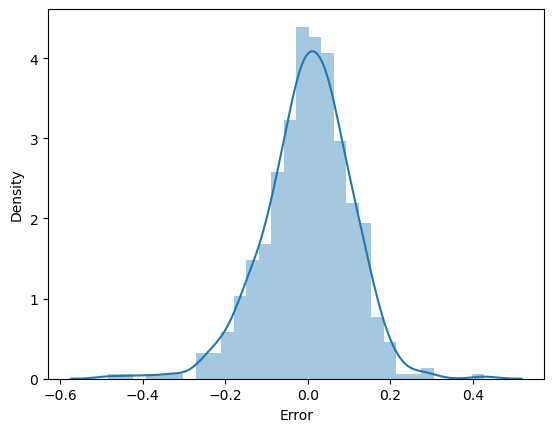

In [43]:
# Histogram for the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
# X-label
plt.xlabel('Error', fontsize = 10) 

Inference: 
==========
The historgram of errors follow a normal curve/ distribution

# Prediction

In [44]:
#Scaling test data
num_vars=['cnt','temp','hum','windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [45]:
# Splitting the test set
y_test = df_test.pop('cnt')
X_test = df_test
X_test = sm.add_constant(X_test)

In [46]:
# Setting the test set for prediction

test_col = X_train_rfe1.columns
X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   season_spring          219 non-null    int32  
 2   season_summer          219 non-null    int32  
 3   season_winter          219 non-null    int32  
 4   mnth_jan               219 non-null    int32  
 5   mnth_sep               219 non-null    int32  
 6   weekday_Saturday       219 non-null    int32  
 7   weathersit_Light_Snow  219 non-null    int32  
 8   weathersit_Mist        219 non-null    int32  
 9   yr                     219 non-null    int64  
 10  workingday             219 non-null    int64  
 11  windspeed              219 non-null    float64
dtypes: float64(2), int32(8), int64(2)
memory usage: 15.4 KB


In [47]:
y_pred = lr_model.predict(X_test)

Text(0, 0.5, 'y_pred')

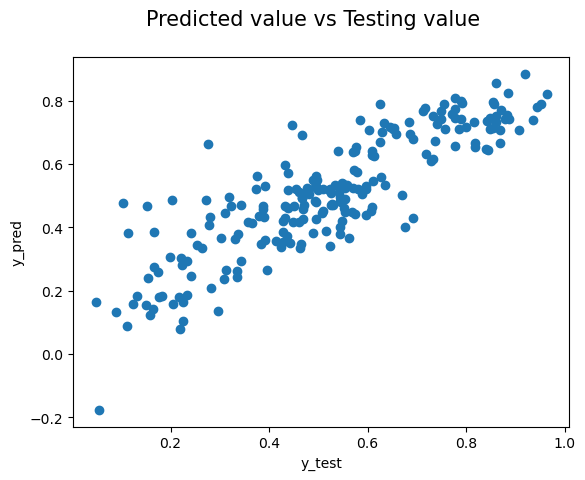

In [48]:
#Plotting the graph for actual vs predicted values
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Predicted value vs Testing value', fontsize = 15)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)

Inference: 
===========
Model is good enough to predict demand of bikes

# R-sq for test

In [49]:
from sklearn.metrics import r2_score
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
r_squared

0.7409269375982523

In [50]:
#Check for the coefficients of the independent variables for the model.

param = pd.DataFrame(lr_model.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient',ascending = False,inplace = True)
param

,Variables,Coefficient
index,,
0,const,0.533414
9,yr,0.247992
5,mnth_sep,0.071353
6,weekday_Saturday,0.065027
10,workingday,0.056660
2,season_summer,-0.040579
3,season_winter,-0.072862
8,weathersit_Mist,-0.088820
4,mnth_jan,-0.103085


# Conclusion

The equation for the best fiited line is :
    cnt = 0.53 + 0.24*yr + 0.07*mnth_sep + 0.06*weekday_Saturday + 0.056*workingday -0.04*season_summer -0.07*season_winter -0.089*weathersit_Mist -0.1*mnth_jan -0.19 *windspeed-0.26*season_spring-0.30*weathersit_Light_Snow

1. Year, September month, weekday of Saturday, working day is positively impacting the demand
2. Summer season, winter season, misty weather situation, windspeed, spring season and Light snow are negatively proportional and negatively impacting demand